In [3]:
import pandas as pd
import numpy as np
from datetime import *
import matplotlib.pyplot as plt


## Piecewisely fetching Binance data

In [34]:

from download_binance import *
import datetime
symbols = [ "ETH"]
period = "1m"

time_list = [datetime.datetime(2017, 1,  1, 0, 0),datetime.datetime(2018, 1,  1, 0, 0)]
df_list = []
for n in range(len(time_list)-1):
    print(time_list[n], time_list[n+1])
    for i, symbol in enumerate( symbols[:] ):

        print(f"Begin downloading: H1-{symbol}")
        df = get_data_since(symbol, time_list[n], time_list[n+1], period )
        print(df['timestamp'].values[0],df['timestamp'].values[-1])
        df_list.append( df )
       
        print(f"Download completed: H1-{symbol}")
        print(f"There are {df.close.isna().sum() } N/As in close prices.")
       

2017-01-01 00:00:00 2018-01-01 00:00:00
Begin downloading: H1-ETH
2017-08-17T04:00:00.000000000 2018-01-01T08:23:00.000000000
Download completed: H1-ETH
There are 0 N/As in close prices.


In [8]:

from download_binance import *
import datetime
symbols = [ "ETH"]
period = "1m"

time_list = [datetime.datetime(2017, 1,  1, 0, 0),datetime.datetime(2018, 1,  1, 0, 0),datetime.datetime(2019, 1,  1, 0, 0),datetime.datetime(2020, 1, 1, 0, 0)
,datetime.datetime(2021, 9, 1, 0, 0)]
df_list = []
for n in range(len(time_list)-1):
    print(time_list[n], time_list[n+1])
    for i, symbol in enumerate( symbols[:] ):

        print(f"Begin downloading: H1-{symbol}")
        df = get_data_since(symbol, time_list[n], time_list[n+1], period )
        print(df['timestamp'].values[0],df['timestamp'].values[-1])
        df_list.append( df )
       
        print(f"Download completed: H1-{symbol}")
        print(f"There are {df.close.isna().sum() } N/As in close prices.")
        del(df)

2017-01-01 00:00:00 2018-01-01 00:00:00
Begin downloading: H1-ETH
2017-08-17T04:00:00.000000000 2018-01-01T08:23:00.000000000
Download completed: H1-ETH
There are 0 N/As in close prices.
2018-01-01 00:00:00 2019-01-01 00:00:00
Begin downloading: H1-ETH
2017-12-31T16:00:00.000000000 2018-12-31T22:16:00.000000000
Download completed: H1-ETH
There are 0 N/As in close prices.
2019-01-01 00:00:00 2020-01-01 00:00:00
Begin downloading: H1-ETH
2018-12-31T16:00:00.000000000 2019-12-31T18:43:00.000000000
Download completed: H1-ETH
There are 0 N/As in close prices.
2020-01-01 00:00:00 2021-09-01 00:00:00
Begin downloading: H1-ETH
2019-12-31T16:00:00.000000000 2021-08-31T19:06:00.000000000
Download completed: H1-ETH
There are 0 N/As in close prices.


### Concat, remove overlapping

In [9]:
for df in df_list:
    df.rename(columns={'timestamp':'datetime'})
    df.set_index('timestamp',inplace = True)
    df.index = pd.to_datetime(df.index)

In [10]:
df_CEX = pd.concat([df_list[0] ,  df_list[1][ (df_list[1].index > '2018-01-01 08:23:00')&  (df_list[1].index<'2018-12-31 16:00:00')], 
          df_list[2][(df_list[2].index<'2019-12-31 16:00:00' )],
          df_list[3]])

In [25]:
df_CEX = df_CEX.set_index('datetime')
df_CEX

,open,high,low,close,volume
datetime,,,,,
2018-01-01 08:24:00,755.50,755.53,755.00,755.45,47.79923
2018-01-01 08:25:00,755.46,755.46,755.00,755.00,17.67078
2018-01-01 08:26:00,755.00,755.42,755.00,755.01,73.71388
2018-01-01 08:27:00,755.00,755.38,754.14,754.98,18.38837
2018-01-01 08:28:00,754.40,755.00,752.79,752.85,48.31645
...,...,...,...,...,...
2021-08-31 19:02:00,3413.04,3419.95,3412.11,3418.15,1116.35570
2021-08-31 19:03:00,3418.14,3420.10,3414.00,3419.96,1048.16430
2021-08-31 19:04:00,3419.97,3420.87,3418.51,3420.83,407.92530


In [44]:
df_CEX.to_csv('Data/Binance/ETH_2017to2021.csv')

In [32]:
df_CEX

,open,high,low,close,volume
datetime,,,,,
2018-01-01 08:24:00,755.50,755.53,755.00,755.45,47.79923
2018-01-01 08:25:00,755.46,755.46,755.00,755.00,17.67078
2018-01-01 08:26:00,755.00,755.42,755.00,755.01,73.71388
2018-01-01 08:27:00,755.00,755.38,754.14,754.98,18.38837
2018-01-01 08:28:00,754.40,755.00,752.79,752.85,48.31645
...,...,...,...,...,...
2021-08-31 23:56:00,3439.80,3439.94,3436.02,3437.78,339.68400
2021-08-31 23:57:00,3437.78,3439.33,3433.54,3434.63,301.18490
2021-08-31 23:58:00,3434.63,3434.63,3429.77,3431.94,400.25870


### Add more data

In [13]:

time_list = [datetime.datetime(2021, 8, 1, 0, 0),datetime.datetime(2021, 9, 30, 0, 0)]

df_list = []
for n in range(len(time_list)-1):
    print(time_list[n], time_list[n+1])
    for i, symbol in enumerate( symbols[:] ):

        print(f"Begin downloading: H1-{symbol}")
        df = get_data_since(symbol, time_list[n], time_list[n+1], period )
        df_list.append( df )
       
        print(f"Download completed: H1-{symbol}")
        print(f"There are {df.close.isna().sum() } N/As in close prices.")
        del(df)

2021-08-01 00:00:00 2021-09-30 00:00:00
Begin downloading: H1-ETH
Download completed: H1-ETH
There are 0 N/As in close prices.


In [30]:
df = df_list[0]
df.rename(columns={'timestamp':'datetime'},inplace=True)
df= df.set_index('datetime')
df=df[ (df.index > '2021-08-31 19:06:00')&( df.index<'2021-09-01 00:01:00')]

In [31]:
df_CEX = pd.concat([df_CEX,df])
df_CEX.to_csv('Data/Binance/ETH_2017to2021.csv')

### Other's method

In [25]:
from query_data.QueryBinance import *
import os
timeframe = "1h" # 1m, 1h, 1d 
since = '2023-03-24T00:00:00Z'
end = '2023-03-25T00:00:00Z'
newT = pd.Timestamp.today(tz='UTC')+timedelta(hours=-1)
end = str(newT)
print(end)
base_token = "ETH"
quote_token = "USDT"
#base_token_list = ["BTC","ETH","SOL","ATOM","LINK","AVAX","MATIC","CRV","BNB"]
base_token_list = ['ETH']

for base_token in base_token_list:
    exchange_id = 'binance'
    symbol = f"{base_token}/{quote_token}"
    filename = f"({since[:10]},{end[:10]})_{base_token}{quote_token}_{timeframe}.csv"
    if not os.path.exists(filename):
        scrape_candles_to_csv(filename=filename, exchange_id=exchange_id, symbol=symbol,
                                            timeframe=timeframe, since=since, end=end, max_retries=3, limit=1000,
                                            rest_time=1, cat=None)

2024-01-25 06:45:35.183589+00:00
Fetched 1000 ETH/USDT candles from 2023-03-24T00:00:00.000Z to 2023-05-04T16:00:00.000Z
Fetched 1000 ETH/USDT candles from 2023-05-04T16:00:00.000Z to 2023-06-15T07:00:00.000Z
Fetched 1000 ETH/USDT candles from 2023-06-15T08:00:00.000Z to 2023-07-26T23:00:00.000Z
Fetched 1000 ETH/USDT candles from 2023-07-27T00:00:00.000Z to 2023-09-06T15:00:00.000Z
Fetched 1000 ETH/USDT candles from 2023-09-06T16:00:00.000Z to 2023-10-18T07:00:00.000Z
Fetched 1000 ETH/USDT candles from 2023-10-18T08:00:00.000Z to 2023-11-28T23:00:00.000Z
Fetched 1000 ETH/USDT candles from 2023-11-29T00:00:00.000Z to 2024-01-09T15:00:00.000Z
Fetched 375 ETH/USDT candles from 2024-01-09T16:00:00.000Z to 2024-01-25T06:00:00.000Z
Saved 7375 candles from 2023-03-24T00:00:00.000Z to 2024-01-25T06:00:00.000Z to (2023-03-24,2024-01-25)_ETHUSDT_1h.csv
----------------------------------------------------------------------------------------------------
sleep 1 sec
--------------------------------

In [30]:
pd.Timestamp.today(tz='UTC+08:00')

Timestamp('2024-01-25 17:03:34.798698+0800', tz='UTC+08:00')

9

0

#### Test

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=[-99,-4,-4,-4,-3,-2,-2.5,-1.3,-1.02,0,0,-1.02,1,1,1,1,2,2.3,3,3,4.66,4.9,133,55,5]

In [4]:
np.arange(-5,5)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

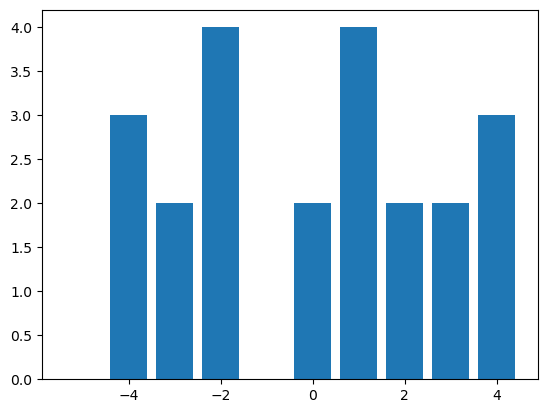

In [5]:
c, b = np.histogram(x,bins=np.arange(-5,6))
plt.bar(x=b[:-1],height=c);

In [8]:
c

(22, 25)

In [14]:
b

array([-99. , -75.8, -52.6, -29.4,  -6.2,  17. ,  40.2,  63.4,  86.6,
       109.8, 133. ])

In [7]:

from download_binance import *
import datetime
symbols = [ "BTC"]
period = "1m"

time_list = [datetime.datetime(2017,8,17, 16,0),datetime.datetime(2023, 10,  19, 0, 0)]

for i, symbol in enumerate( symbols[:] ):

    print(f"Begin downloading: H1-{symbol}")
    df = get_data_since(symbol, time_list[0], time_list[1], period )
    print(df['timestamp'].values[0],df['timestamp'].values[-1])       
    print(f"Download completed: H1-{symbol}")
    print(f"There are {df.close.isna().sum() } N/As in close prices.")


Begin downloading: H1-BTC
2017-08-17T08:00:00.000000000 2023-10-19T05:51:00.000000000
Download completed: H1-BTC
There are 0 N/As in close prices.


In [9]:
df.to_csv('Data/Binance/BTC/BTC_USD_1min.csv')

In [12]:
import json
import os 
import matplotlib.pyplot as plt
from datetime import datetime , timedelta
import TransformData

In [18]:
#using WETH vs USDC (now token_0 is USDC!)
token_0 ='USDT'
token_1 ='WETH'
path = "Data/Mainnet/WETH_USDC_mainnet"
with open(path0 + "_config.json", 'r') as f:
    TransformData.config = json.load(f)
df_m_500 = TransformData.main(path+'_500',token_0,token_1)

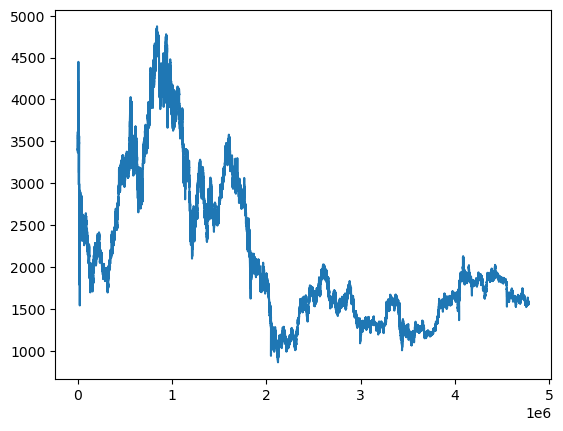

In [15]:
plt.plot(df_m_500.price.values)

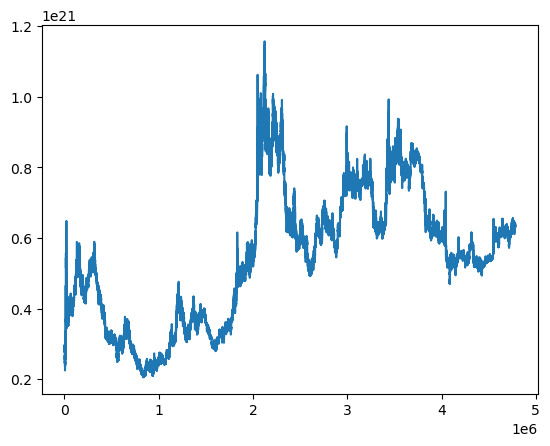

In [19]:
plt.plot(df_m_500.price.values)

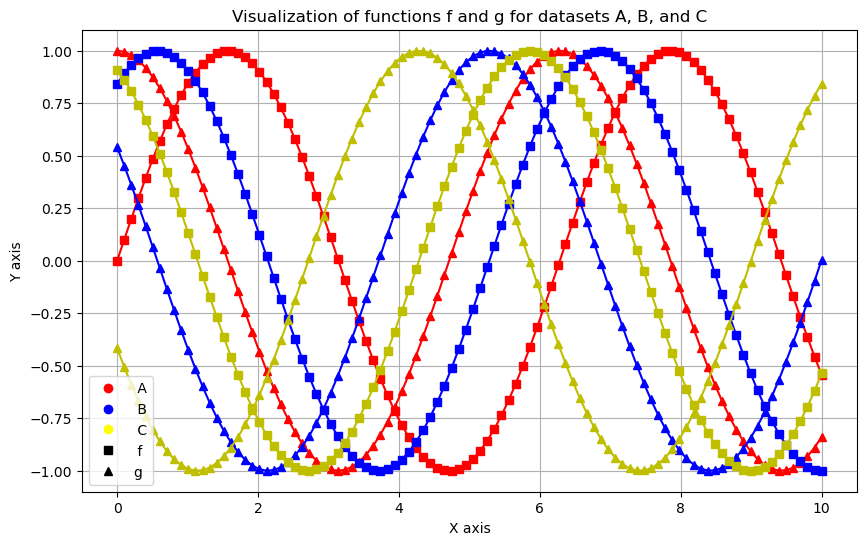

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 假设的数据
x = np.linspace(0, 10, 100)
f_A = np.sin(x)
g_A = np.cos(x)
f_B = np.sin(x + 1)
g_B = np.cos(x + 1)
f_C = np.sin(x + 2)
g_C = np.cos(x + 2)

# 绘图
plt.figure(figsize=(10, 6))

# 对于A数据源
plt.plot(x, f_A, 'r-', marker='s', label='f(A)')  # 红色方块表示f
plt.plot(x, g_A, 'r-', marker='^', label='g(A)')  # 红色三角表示g

# 对于B数据源
plt.plot(x, f_B, 'b-', marker='s', label='f(B)')  # 蓝色方块表示f
plt.plot(x, g_B, 'b-', marker='^', label='g(B)')  # 蓝色三角表示g

# 对于C数据源
plt.plot(x, f_C, 'y-', marker='s', label='f(C)')  # 黄色方块表示f
plt.plot(x, g_C, 'y-', marker='^', label='g(C)')  # 黄色三角表示g

# 自定义图例
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', marker='o', linestyle=''),
                Line2D([0], [0], color='blue', marker='o', linestyle=''),
                Line2D([0], [0], color='yellow', marker='o', linestyle=''),
                Line2D([0], [0], color='black', marker='s', linestyle=''),
                Line2D([0], [0], color='black', marker='^', linestyle='')]

plt.legend(custom_lines, [' A', ' B', ' C', ' f', 'g'])

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Visualization of functions f and g for datasets A, B, and C')
plt.grid(True)
plt.show()


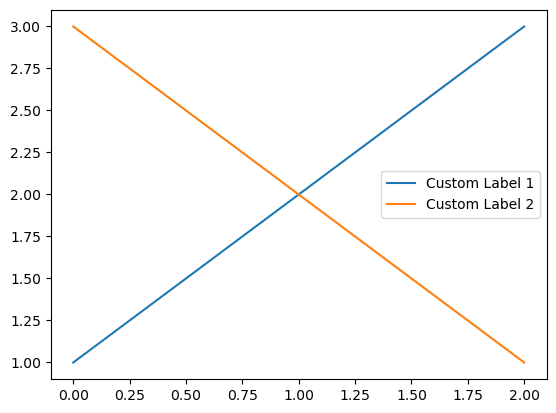

手动设置的 handles 和 labels：
handles: [<matplotlib.lines.Line2D object at 0x00000211F8144730>, <matplotlib.lines.Line2D object at 0x00000211F81449D0>]
labels: ['Custom Label 1', 'Custom Label 2']

ax.get_legend_handles_labels() 返回的值：
handles: [<matplotlib.lines.Line2D object at 0x00000211F8144730>, <matplotlib.lines.Line2D object at 0x00000211F81449D0>]
labels: ['Line 1', 'Line 2']


In [3]:
import matplotlib.pyplot as plt

# 创建一个示例图
fig, ax = plt.subplots()
line1, = ax.plot([1, 2, 3], label='Line 1')
line2, = ax.plot([3, 2, 1], label='Line 2')

# 手动设置图例
A = [line1, line2]
B = ['Custom Label 1', 'Custom Label 2']
ax.legend(handles=A, labels=B)
# 获取当前的 handles 和 labels
hand, lab = ax.get_legend().legendHandle()
plt.show()

print("手动设置的 handles 和 labels：")
print("handles:", A)
print("labels:", B)

print("\nax.get_legend_handles_labels() 返回的值：")
print("handles:", hand)
print("labels:", lab)


In [10]:
legend=ax.get_legend()


['Custom Label 1', 'Custom Label 2']

In [34]:
legend.legendHandles

C:\Users\std92\AppData\Local\Temp\ipykernel_7964\1743036997.py:1: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles


C:\Users\std92\AppData\Local\Temp\ipykernel_9940\2202621319.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticklabels_new)


Text(0, 0.5, 'value')

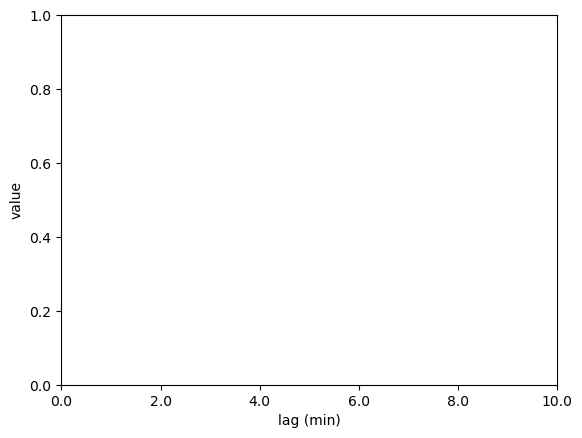

In [51]:
fig,ax =plt.subplots();

x_ticklabels = ax.get_xticklabels()
x_ticklabels_new =[]
for lab in x_ticklabels:
    s = float(lab.get_text())*10
    lab.set_text(f'{s}')
    x_ticklabels_new.append(lab)
ax.set_xticklabels(x_ticklabels_new)
plt.xlabel('lag (min)')
plt.ylabel('value')

TypeError: 'Text' object is not iterable